<a href="https://colab.research.google.com/github/codestates/ds-section1-sprint2-new/blob/main/n123-Hypothesis-Test/n123-Hypothesis%20Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 3*

---

# Hypothesis Test

## 🏆 학습 목표 
- 상황에 맞는 귀무가설과 대립가설을 세울수 있다.
- 1종 오류와 2종 오류 설명할 수 있다.
- 유의 수준을 이용하여 옳은 가설을 채택할 수 있다. 

---

이 노트는 아래의 구성으로 이뤄져 있습니다.
- **Part 0. 도입**  
  0-1. 기획 배경  
  0-2. Data Description  

- **Part 1. 가설 검정** <br>
  1-1. 귀무가설과 대립가설 <br>
  1-2. 1종 오류 vs 2종 오류 <br>
  1-3. 가설 세우기 <br>

- **Part 2. 검정 방법론**  
  2-1. 첫번째 예시 (One sample) <br>
  2-2. 두번째 예시 (Two sample)  

- **Part 3. 결론**


# **Part 0. 도입**
<img width='500' src='https://i.imgur.com/2EQjai4.png'>









## **0-1. 기획 배경**

- 한 남자가 있습니다. 이 남자는 법을 어겼다는 이유로 재판을 받고 있습니다. <br>
하지만 **충분한 증거**를 모아 유죄 확정판결이 나기 전까지 이 남자는 **무죄로 추정**받게 됩니다. <br>
이것을 **`무죄추정의 원칙`** 이라고 하며, 이는 **`가설검정의 대표적인 예`**입니다. <br>
이렇듯 가설검정은 일상생활에 알게 모르게 녹아 있는 통계 지식으로 <br>

 우리는 이번 Case Study를 통해 가설검정에 대해 공부해 보도록 합니다.



## **0-2. Data Description**

- 우리는 청소년기에 섭취한 성장 호르몬제가 성인의 키에 영향을 주는지 **가설검정을 시행**하고자 합니다.  
청소년기에 성장 호르몬제를 섭취한 성인의 키와 그렇지 않은 성인의 키의 데이터를 이용하여 ***가설의 합당성 여부를 확인하고자 합니다.***


<img width='400' src='https://i.imgur.com/l3SsUsc.png'>

> **성장 호르몬 데이터**
- **user_id**: 실험 대상자의 유저 아이디
- **성장호르몬_투약**: 18세 이전에 청소년가 성장호르몬을 섭취 했는지 안했는지
- **키**: 실험 대상자 유저의 키 (cm)


# **Part 1. 가설 검정**

**가설 검정**이란 관심 있는 특정 모집단의 특성에 대한 가설을 세우고, <br>
이 가설을 **샘플 데이터**를 사용하여 검토하는 추론의 과정을 일컫습니다. <br> 
여러분들은 가설을 어떻게 세우고 가설검정으로부터 나온 결과를 어떻게 평가하는지 배워보도록 합니다. 

<br>

> **💡 용어 정리** <br> 
가설검정에 대해 배우기전, 아래의 테이블에서 용어에 익숙해지도록 합니다.
<img src = 'https://i.imgur.com/EoqEGI3.png' width=750>



## **1-1. 귀무가설와 대립가설**


**가설검증이란**, 우리가 알고자 하는 질문을 **두 개의 대립되는 가설**로 세우고 <br> 
이것의 참과 거짓을 **`수집한 데이터를 통해 판단`**하는 것입니다.  

  1. **귀무가설** 
    - 데이터를 수집하기 전 사실이라고 믿는 가설 
    - 수학적으로 **`=`** 사인을 포함합니다. 
    - **`=, =>, =<`**

  2.**대립가설** 
    - 귀무가설과 대립되는 가설로 우리가 사실이라고 증명하고자 하는 가설
    - 수학적으로 **`=`** 사인을 포함하지 않습니다. 
    - **`>, <, !=`**


**귀무가설**과 **대립가설**은 서로 대립해야 하고 겹치는 부분이 있어서는 안됩니다. 
 
<br>

> **🥇 가설 세우는 규칙** <br> 
아래는 귀무가설과 대립가설을 세울시 지켜야하는 사항을 정리한 것으로, 이를 잘 숙지하고 계시기 바랍니다.
  - 귀무가설은 어떠한 데이터를 수집하기 전 사실이라 간주되는 가설입니다.
  - 대립가설은 우리가 사실이라고 주장하고자 하는 가설입니다.
  - 귀무가설과 대립가설은 competing하고, non-overlapping 해야 합니다.
  - 귀무가설은 **`equal sign (=)`** 을 포함하고 있는 아래와 같은 부호를 사용합니다. 
    - =, <=, >= 
  - 대립가설은 **`equal sign (=)`** 을 포함하지 않는 아래와 같은 부호를 사용합니다. 
    - !=, >, <

## **1-2. 1종 오류 vs 2종 오류**

우선, 위의 재판에서 죄의 유무를 검사가 판단하는 데 있어서 어떠한 종류의 결과가 존재하는지 확인해보도록 합시다. 

아래의 테이블과 같이 네 개의 결과가 존재합니다.

<img width='650' src='https://i.imgur.com/V5FJRXw.png'> <br>

<br>

네 개의 결과 중 **2개는 오류를 범하지 않은 경우**이며, **2개는 오류를 초래한 경우**입니다. <br> 
오류를 초래한 두 가지 경우를 우리는 **제1종 오류**와 **제2종 오류**라 칭합니다. <br>

그리고 아래의 테이블은 위의 결과를 일반화한 테이블 입니다. 

<img width='450' src='https://i.imgur.com/k3WgVLj.png'> <br>


- **제1종 오류**
  - 귀무 가설이 참인데 기각한 경우로, 위의 예로는 남자는 죄가 없는데 죄가 있다고 잘못 판단한 경우입니다. 
  - 이는 alpha로도 지칭하며 유의수준 이라고도 합니다. 유의수준이란 귀무가설이 참인데도 불구하고 기각할 확률을 의미하며 이 값이 0.05보다 작으면 귀무 가설을 잘못 기각할 가능성이 5% 미만이며, 그만큼 잘못 기각할 가능성이 낮음을 인정하고 우리는 귀무가설을 기각할 충분한 증거를 확보했다는 의미입니다.
  - False positive 라고도 합니다.

- **제2종 오류**
  - 귀무 가설이 거짓인데 기각하지 않은 경우로, 위의 예로는 남자는 죄가 있는데 죄가 없다고 잘못 판단한 경우입니다. 
  - 이는 beta로도 지칭 됩니다.
  - False negative 라고도 합니다.

<br>

> **🔎 Quiz** <br> 
사람의 유죄를 판결하는 재판의 경우 **제1종 오류**와 **제2종 오류** 중 어떠한 에러가 더 위험한 에러일까요?

## **1-3. 가설 세우기**

다양한 시나리오를 파악하고 **옳은 가설**을 세우는 것은 중요합니다. <br>
아래의 세가지 시나리오를 통해 가설 세우는 연습을 해보도록 합니다. <br> 

그리고 아래의 세가지 경우중, <br>
우리는 **`a.`**와 **`b.`** 두 가설의
통계적 유의성을 **Part 2** 에서 확인해 보도록 합니다. 

<br>

**`a.`** 만약 여러분들이 성장 호르몬약을 섭취한 사람들의 평균키가 172.5cm 보다 큰지를 판단하고자 한다면, <br> 아래와 같이 가설을 세우며 이를 **`단측 검정`**이라 합니다.

$H_0: \mu_{섭취} \leq 172.5cm $ <br> 
$H_1: \mu_{섭취} > 172.5cm $ <br> 

<br>

**`b.`** 만약 여러분들이 성장호르몬약을 섭취한 사람들의 평균키가 섭취하지 않은 사람들의 평균키보다 큰지를 판단하고자 한다면, <br>
아래와 같이 가설을 세우며 이를 **`단측 검정`**이라 합니다. 

$H_0: \mu_{섭취} \leq \mu_{미섭취} $ <br> 
$H_1: \mu_{섭취} > \mu_{미섭취} $ <br> 


<br>

**`c.`** 만약 여러분들이 성장호르몬약을 섭취한 사람들의 평균키가 섭취하지 않은 사람들의 평균키와 다른지를 판단하고자 한다면, <br> 
아래와 같이 귀무가설과 대립가설을  세우며 이를 **`양측 검정`**이라 합니다.

$H_0: \mu_{섭취} = \mu_{미섭취} $ <br> 

$H_1: \mu_{섭취} \neq \mu_{미섭취} $ <br> 


<br>


> ⚠️ <br>
> $\mu_{섭취}$과 $\mu_{미섭취}$는 **성장호르몬약을 섭취한 사람들의 모수**와 **그렇지 않은 사람들의 모수**를 나타냅니다. <br>
> 가설검정은 우리에게 **모집단의 모수에 관한 정보**를 주는 것이지 샘플 데이터의 통계치에 대한 정보를 주는 것이 아닙니다.

# **Part 2. 검정 방법론**

귀무가설과 대립가설을 세운 뒤, 우리는 데이터를 이용하여 어떤 가설을 채택할지 결정하게 되는데 <br>
이에는 **두 가지 방법**이 있습니다.

<br>

  1. **신뢰구간 확인**
      - 우리는 우리가 가지고 있는 샘플 데이터로 **평균의 표본 분포 (sampling distribution of mean values)** 를 시뮬레이트 한 뒤, 이를 **모집단의 분포**라고 가정합니다. 그리고 이 분포에서 **`95% 신뢰구간`**을 확인한 뒤, 우리의 귀무가설이 이 표본 분포 어디에 해당하는지 확인하여 귀무가설을 채택할지 기각할지를 결정합니다. <br>
 > **1.** 우리가 가지고 있는 샘플 데이터를 **`모집단(population)`**이라 가정합니다. <br>
   **2.** 이 모집단에서 10,000번 랜덤으로 샘플을 꺼내 평균을 계산한뒤 리스트에 저장합니다. <br>
   **3.** 이 평균값들을 이용해 **평균의 표본 분포**를 시뮬레이트합니다.  <br>
   **4** **`95% 신뢰구간`**은 모집단의 모수를 포함할 확률이 95%인 구간으로 우리가 시뮬레이트 한 분포에서 어디어 해당하는지 확인합니다. <br> 
   **5.** 우리의 귀무가설이 신뢰구간에 비교하여 어디에 해당하는지 확인한 뒤 ***어떤 가설을 채택할지 결정합니다.***

  2. **P-value 확인**
      - **P-value란**, 귀무가설이 맞다는 전제 하에, 통계값이 실제로 관측된 값 (샘플의 통계치) 이상일 확률을 의미합니다. 우리는 우리가 세운 귀무 가설이 사실임을 가정하고, 귀무 가설이 대립 가설과 가장 근접하게 있는 값으로 귀무 분포를 시뮬레이트한 뒤 (예를들어, 위의 가설에서는 **`172.5`** 값이 귀무 가설이 대립 가설과 가장 근접하게 있는 값입니다), 샘플 데이터에서의 평균값이 이 분포 어디에 존재하는지를 확인합니다. 그리고 이 평균값보다 큰 부분을 확인함으로서 ***어떤 가설을 채택할지 결정합니다.***
> **1.** 우리가 가지고 있는 샘플 데이터로 **평균의 표본 분포를 시뮬레이트** 한뒤, 분포의 **`표준 편차`**를 변수에 저장합니다. <br>
**2.** 귀무가설과 대립가설의 가장 근접한 값과 변수에 저장한 표준 편차를 이용하여 **귀무 분포를 시뮬레이트** 합니다. 이 때 우리는 **정규분포**를 가지게 되며 ([정규분포 공식문서](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) 그 이유는 **중심극한정리**에 의해 수많은 샘플 추출에 의해 분포는 정규분포를 따르게 되기 때문입니다. <br>
**3.** 우리가 시뮬레이트한 귀무 분포에 샘플 데이터의 평균값이 어디에 있는지 확인합니다. <br>
**4.** 귀무 분포에 샘플 데이터의 평균값보다 큰 면적을 확인합니다. 이 면적이 0.05 보다 작으면 귀무가설이 사실인데 기각했을때의 오류가 5%보다 작음을 의미합니다.




In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 성장호르몬.csv to 성장호르몬 (3).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drug = pd.read_csv('성장호르몬.csv')

In [ ]:
drug.head()

,user_id,성장호르몬_투약,키
0,4509,False,163.93
1,1864,True,167.19
2,2060,False,181.15
3,7875,True,174.17
4,6254,True,162.61


## **2-1. 첫번째 예시**

우선, 우리는 **`One sample 단측 검정`**인 **`1-3-a.`**부터 확인하도록 합니다. 

성장 호르몬약을 섭취한 사람들의 평균키가 172.5cm 보다 크고 그렇지 않은 사람들의 평균키는 172.5cm 보다 작다를 판단하고자 하며, <br> 
우리는 아래와 같이 가설을 세웁니다.


$H_0: \mu_{섭취} \leq 172.5cm $ <br>
$H_1: \mu_{섭취} > 172.5cm $

<br>

> ⚠️ <br>
가설검증은 **모집단의 모수**를 테스트 합니다. <br>
그러므로 $\mu_{섭취}$는 **모든 성장호르몬을 주입한 사람들의 평균**을 말합니다. 

### **a. 신뢰구간 확인**


In [ ]:
np.random.seed(10)

means = []

for _ in range(10000):
  bootsample= drug[drug['성장호르몬_투약'] == True].sample(drug.shape[0], replace=True)
  means.append(bootsample.키.mean())

In [ ]:
low = np.percentile(means, 5)
print(low)

173.53233288500334


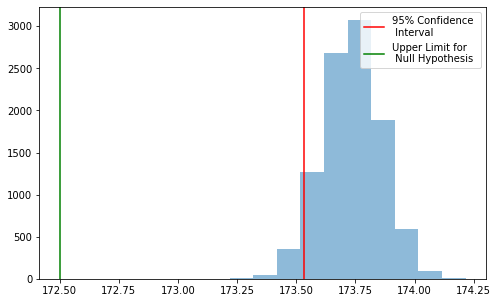

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(means, alpha=0.5)
plt.axvline(x=low, color='r', label='95% Confidence \n Interval')
plt.axvline(x=172.5, color='g', label = 'Upper Limit for \n Null Hypothesis')
plt.legend(fontsize=10);

> **🔎 해설**  
- 위의 분포를 통해 성장호르몬을 주입한 사람들의 모집단의 모수가 **`173.53cm`** 보다 클 확률은 95% 임을 확인할 수 있습니다. 
- 우리가 확인하고자 하는 귀무가설의 최상위 값 **`172.5cm`**는 95% 신뢰구간의 lower limit 보다 작은 것을 확인할수 있습니다. 그러므로 우리의 귀무가설인 모수가 **`172.5cm`** 보다 작다 라는 ***귀무가설을 기각하고 대립가설을 채택합니다.***




### **b. p-value 확인**




In [ ]:
np.random.seed(10)

null_means = []

for _ in range(10000):
  sample = drug[drug.성장호르몬_투약 == True].sample(drug.shape[0], replace=True)
  null_means.append(sample.키.mean())

In [ ]:
# 샘플 데이터에서 성장호르몬약을 투입한 사람들의 평균키 
sample_mean = drug[drug.성장호르몬_투약 == True].키.mean()
print(sample_mean)

173.73649942987458


In [ ]:
sample_std = np.std(null_means)
print(sample_std)

0.12284435188463926


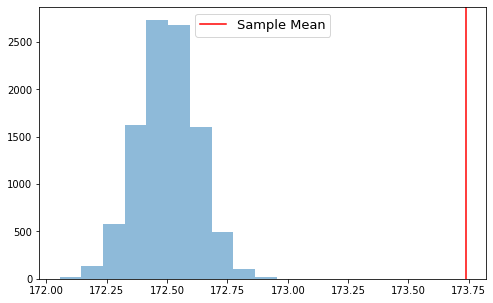

In [ ]:
np.random.seed(10)
plt.figure(figsize=(8,5))
null_vals = np.random.normal(172.5, sample_std, 10000) 
plt.hist(null_vals, alpha=0.5)
plt.axvline(sample_mean, color='r', label='Sample Mean')
plt.legend(fontsize=13);

> **💡 Tip** <br>
위의 null_vals는 **귀무 분포**를 simulate 한것입니다. <br> 
이 귀무 분포를 simulate 할때, **`sample_std = np.std(null_means)`**를 귀무분포의 표준편차로 설정한 이유는 이 귀무 분포를 표본 평균 분포의 모양을 그대로 가져와 시뮬레이트 하기 위함 입니다. 

In [ ]:
# p-value 확인
(null_vals > sample_mean).mean()

0.0

> **🔎 해설**   
- **`샘플 데이터의 평균값`**은 귀무 분포의 끝에 위치하는 것을 알 수 있습니다. 그리고 **`샘플 평균값보다 큰 면적`**은 0.0105으로 아주 작은 것을 알 수 있습니다.
- 이 면적이 바로 **`p-value`**이고, p-value가 0.05 보다 작으면 귀무 가석을 기각하고 대립 가설을 채택하게 되는데 우리의 경우 0.0105으로 우리는 ***안전하게 귀무 가설을 기각합니다.***
- 아래 그림은 귀무 분포에서 p-value가 어디를 나타내는지 보여줍니다. 이로부터 위에서 신뢰구간을 통해 확인한 결과와 p-value가 일맥상통 하는 것을 알 수 있습니다. 

> <img width='500' src='https://i.imgur.com/mN1fTLq.png'>

## **2-2. 두번째 예시**

다음으로 **`Two sample 단측 검정`**인 **`1-3-b.`**를 확인해 보도록 합니다.

만약 여러분들이 성장 호르몬약을 섭취한 사람들의 평균키가 섭취하지 않은 사람들의 평균키보다 큰지를 판단하고자 한다면, <br> 
아래와 같이 가설을 세웁니다.

$H_0: \mu_{섭취} \leq \mu_{미섭취} $ <br>
$H_1: \mu_{섭취} > \mu_{미섭취} $

### **a. 신뢰구간 확인**

In [ ]:
np.random.seed(10)

drug_means, nodrug_means, diff_means = [], [], []

for _ in range(10000):
  sample = drug.sample(drug.shape[0], replace=True)
  
  drug_mean = sample[sample.성장호르몬_투약 == True].키.mean()
  drug_means.append(drug_mean)

  nodrug_mean = sample[sample.성장호르몬_투약 == False].키.mean()
  nodrug_means.append(nodrug_mean)

  diff_means.append(drug_mean - nodrug_mean)
  

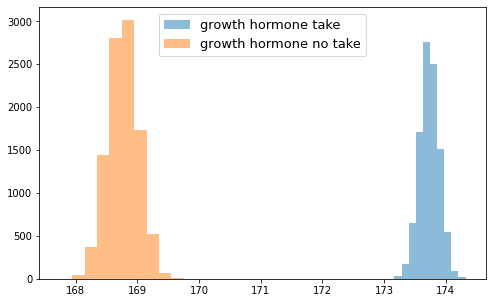

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(drug_means, alpha = 0.5, label='growth hormone take')
plt.hist(nodrug_means, alpha = 0.5, label = 'growth hormone no take')
plt.legend(loc=9, fontsize=13)
plt.show()

> **🔎 해설**  
- 왼쪽의 주황색 분포는 성장호르몬을 섭취하지 않은 사람들의 **평균키 표본 분포 (sampling distribution of mean values)** 입니다. 
- 오른쪽의 파란색 분포는 성장호르몬을 섭취한 사람들의 **평균키 표본 분포** 입니다.
- 이 두 분포는 엄연히 다른 차이를 보여주고 있고, ***성장호르몬을 섭취한 사람들의 평균키는 그렇지 않은 사람들의 평균키보다 월등히 높은 것을 알 수 있습니다.***
- 이를 통해 성장호르몬을 섭취한 사람들의 평균키는 그렇지 않은 사람들의 평균키보다 작거나 같다는 귀무 가설을 기각하고 ***대립 가설을 채택하도록 합니다.***
- 아래는 두 표본 분포를 따로 보는 것이 아닌, **두 분포의 차이**를 시각화하여 확인해보도록 합니다.

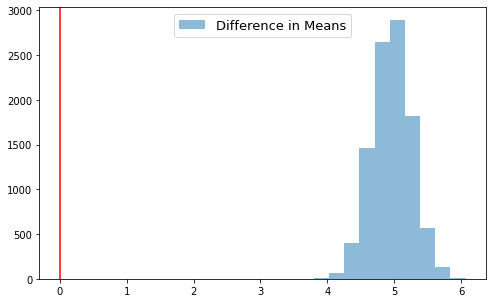

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(diff_means, alpha=0.5, label = 'Difference in Means')
plt.axvline(0, c='r')
plt.legend(loc=9, fontsize=13);

> **🔎 해설**  
- 위의 분포는 성장호르몬을 섭취한 성인의 평균키와 그렇지 않은 성인의 평균키 차이에 대한 표본 분포입니다. <br> 가설을 수학적으로 나타내면 아래와 같이 나타낼 수 있습니다.
> 
>   $H_0: \mu_{섭취} - \mu_{미섭취} \leq 0 $ <br>
$H_1: \mu_{섭취} - \mu_{미섭취} > 0 $

> - 두 평균키의 차이를 나타내는 분포는 **0을 나타내는 빨간선 보다 훨씬 오른쪽에 있음**을 알 수 있고, <br> 그러므로 우리는 두 평균키의 차이가 0보다 작거나 같다라는 귀무가설을 기각하고 ***대립 가설을 채택하게 됩니다.***   

### **b. p-value 확인**

In [ ]:
# 성장호르몬을 투입한 사람의 키와 그렇지 않은 사람의 키 차이 확인
sample_diff_mean = drug[drug.성장호르몬_투약 == True].키.mean() - drug[drug.성장호르몬_투약 == False].키.mean()
sample_diff_mean

4.97022893807133

In [ ]:
sample_diff_std = np.std(diff_means)
sample_diff_std 

0.2905371841232148

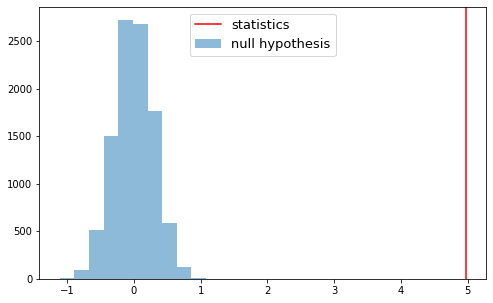

In [ ]:
plt.figure(figsize=(8,5))
null_vals = np.random.normal(0, sample_diff_std, 10000) 
plt.hist(null_vals, alpha=0.5, label='null hypothesis')
plt.axvline(sample_diff_mean, color='r', label='statistics')
plt.legend(loc=9, fontsize=13)
plt.show()

> **🔎 해설**  
- 우리는 귀무 분포와 대립 분포의 가장 **근접한 값인 0**과 두 분포의 차이의 **`표준편차`**를 이용하여 **귀무 분포를 만듭니다.**
- 샘플 데이터에서 성장호르몬을 섭취한 사람들의 평균키와 그렇지 않은 사람들의 **`평균키 차이`**를 계산하고, 귀무 분포에서 이 평균키 차이가 어디에 위치하는지 확인합니다.
- 우리의 경우 이 평균키 차이가 귀무 분포의 아주 먼 오른쪽에 존재함을 알 수 있습니다. 이는 **평군키 차이를 기준으로 귀무 분포 오른쪽으로 어떠한 면적이 존재하지 않음을 알 수 있습니다.** 
- 이는 p-value가 0임을 말하고 이때 우리는 안전하게 ***귀무 가설을 기각하고 대립 가설을 채택하도록 합니다.***

# **Part 3. 결론**

우리는 위에서 상황에 맞는 귀무가설과 대립 가설을 세우고, 이를 우리가 수집한 데이터를 이용하여 둘 중 어떠한 가설을 채택할지에 대해 배웠습니다. 채택하는 과정에서 여러 통계적인 지식인 **가설 검정, 표본 분포, 1종 오류 vs 2종 오류 그리고 신뢰 구간** 등에 대해서 배웠습니다. 

여러분들은 이러한 통계적 지식을 잘 습득한뒤, 어떠한 상황에서도 이를 응용 할 수 있도록 합니다.   